In [65]:
import numpy as np
import matplotlib.pyplot as plt

# **a)**

Niech dana będzie gra na planszy 1D na liczbach 0,1,2,3,4.Gracz może grać w prawo, albo STOP. Jeśli gracz zagra w prawo, jego stan zwiększa się o 1 (poza stanem , gdy stan się nie zmienia) i nie dostaje żadnej nagrody.
Jeśli gracz zagra STOP, gra się kończy, a on dostaje nagrodę: +1, jeśli był w stanie 0, +5 jeśli był w stanie 4, +0 jeśli był w pozostałych stanach.

W przypadku tej gry mamy wyłącznie dwie akcje (STOP oraz pójście w prawo), zatem <br>
Równanie Bellmana wygląda następująco: **V(s) = max(R(s), $\gamma$ * V(s+1))**

In [66]:
states = list(range(5))
rewards = [1, 0, 0, 0, 5]
gammas = np.linspace(0.01, 1, 100)

In [67]:
def get_optimal_policy(gamma, states, rewards, epsilon=1e-6):
    V = np.zeros(len(states))
    while True:
        delta = 0
        for s in range(len(states)):
            if s == len(states) - 1:
                v = rewards[s]
            else:
                # z równania Bellmana
                v = max(rewards[s], gamma * V[s+1])
            delta = max(delta, abs(v-V[s]))
            V[s] = v
        if delta < epsilon: # zbieżność
            break
    
    policy = []
    for s in range(len(states) - 1):
        # chcemy poruszać się w prawo dopóki wartość zdyskontowana sąsiedniego stanu jest większa niż nagroda za zakończenie gry
        if rewards[s] < gamma * V[s+1]:
            policy.append('RIGHT')
        else:
            policy.append('STOP')
    policy.append('STOP')
    return policy

In [68]:
# szukamy optymalnej polityki dla każdej gammy
policies = []
for gamma in gammas:
    policies.append((
        gamma,
        get_optimal_policy(gamma, states, rewards)
    ))

In [77]:
for i in range(1, len(policies)):
    if policies[i][1] != policies[i-1][1]:
        print(policies[i][0])
        break

0.67


Zmiana optymalnej polityki przy $\gamma$ = **0.67**

# **b)**

Gra jest na planszy 1D na liczbach 0,...99. Gracz może grać w prawo, albo STOP. Jeśli gracz zagra w prawo, jego stan zwiększa się o 1 (poza stanem 
, gdy stan się nie zmienia) i nie dostaje żadnej nagrody. Jeśli gracz zagra STOP, gra się kończy, a on dostaje nagrodę RÓWNĄ WARTOŚCI STANU W KTÓRYM SIĘ ZNAJDUJE

Podobnie jak w poprzedniej grze, równanie Bellmana ma postać  **V(s) = max(R(s), $\gamma$ * V(s+1))**

In [70]:
states2 = list(range(101))
rewards2 = list(range(101))

In [71]:
policies2 = []
for gamma in gammas:
    policies2.append((
        gamma,
        get_optimal_policy(gamma, states2, rewards2)
    ))

In [72]:
points_obtained = []
for policy in policies2:
    points_obtained.append((
        policy[0],
        policy[1].index('STOP')
    ))

In [79]:
points_obtained

[(0.01, 1),
 (0.02, 1),
 (0.03, 1),
 (0.04, 1),
 (0.05, 1),
 (0.060000000000000005, 1),
 (0.06999999999999999, 1),
 (0.08, 1),
 (0.09, 1),
 (0.09999999999999999, 1),
 (0.11, 1),
 (0.12, 1),
 (0.13, 1),
 (0.14, 1),
 (0.15000000000000002, 1),
 (0.16, 1),
 (0.17, 1),
 (0.18000000000000002, 1),
 (0.19, 1),
 (0.2, 1),
 (0.21000000000000002, 1),
 (0.22, 1),
 (0.23, 1),
 (0.24000000000000002, 1),
 (0.25, 1),
 (0.26, 1),
 (0.27, 1),
 (0.28, 1),
 (0.29000000000000004, 1),
 (0.3, 1),
 (0.31, 1),
 (0.32, 1),
 (0.33, 1),
 (0.34, 1),
 (0.35000000000000003, 1),
 (0.36000000000000004, 1),
 (0.37, 1),
 (0.38, 1),
 (0.39, 1),
 (0.4, 1),
 (0.41000000000000003, 1),
 (0.42000000000000004, 1),
 (0.43, 1),
 (0.44, 1),
 (0.45, 1),
 (0.46, 1),
 (0.47000000000000003, 1),
 (0.48000000000000004, 1),
 (0.49, 1),
 (0.5, 1),
 (0.51, 2),
 (0.52, 2),
 (0.53, 2),
 (0.54, 2),
 (0.55, 2),
 (0.56, 2),
 (0.5700000000000001, 2),
 (0.5800000000000001, 2),
 (0.59, 2),
 (0.6, 2),
 (0.61, 2),
 (0.62, 2),
 (0.63, 2),
 (0.64, 2)

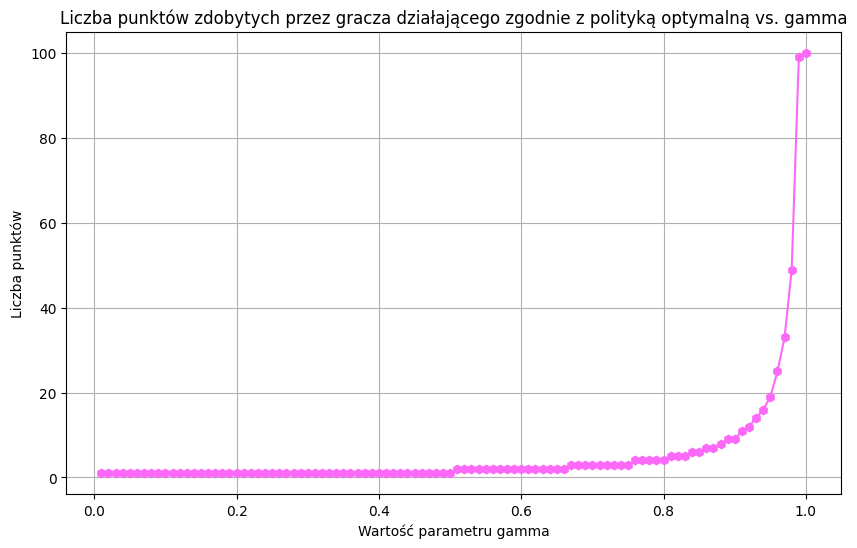

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(
    [g[0] for g in points_obtained],
    [p[1] for p in points_obtained],
    marker='h',
    c='#fc69f8'
)
plt.xlabel('Wartość parametru gamma')
plt.ylabel('Liczba punktów')
plt.title('Liczba punktów zdobytych przez gracza działającego zgodnie z polityką optymalną vs. gamma')
plt.grid(True)
plt.show()

Dopiero dla $\gamma$ bardzo bliskich 1 optymalna polityka zmienia się na tyle, by agent 'rozumiał' potrzebę kierowania się jak najbardziej w prawo. <br> Dla $\gamma$ = 0.98 agent zdobyłby 49 punktów, dla $\gamma$ = 0.99 zdobyłby już 99 punktów.